## Exploratory work with IPython Notebook and pandas

### IPython Notebooks

* Web based interactive computing environment
* Notebook connects to a pluggable backend (not just IPython - see Project Jupyter)
* Export functionality (eg these slides)
* IPython Notebook docs: http://ipython.org/ipython-doc/3/notebook/notebook.html
* Project Jupyter: https://jupyter.org/
* Indepth tutorial: http://ipython.org/notebook.html#scipy-2013

####  Notebook good practice

* Notebooks should be re-runnable
* Notebooks should be kept under version control
* Self-documenting (read like a report)
* Make code modular (define functions outside, import as needed)
* Setting up a server: http://ipython.org/ipython-doc/3/notebook/public_server.html
* Security (executing code in a browser): http://ipython.org/ipython-doc/3/notebook/security.html

#### A few easy wins

* Run your iPython server from a virtual env
* User agnostic db access (eg .my.cnf)
* Public data (/var/data/client/... not /home/alex/stuff/faff/data/big.csv)
* Consider clearing output before committing

#### Magics

Mini command language inside IPython

https://ipython.org/ipython-doc/dev/interactive/magics.html

Some common magics within IPython Notebooks are:
* %lsmagic - list currently available magics
* %matplotlib inline - inline backend
* %env - manage environment variables

### NumPy

* 'Numerical Python'
* Key datatype is the ```ndarray```
* Broadcast operations (```np.max```)
* Linear algebra (see ```np.linalg``` package)
* Set logic
* Sorting
* Input/output
* Integrate with C, C++, Fortran
* And lots more


### pandas

* Built on top of NumPy (so plays well with NumPy based libraries eg scikit learn)
* Two key data structures are ```Series``` and ```DataFrame```
* ```Series``` is a one dimensional array with an ```index```
* ```DataFrame``` is a tabular/spreadsheet datastructure with ordered collection of columns (can be thought of as a ```dict``` of ```Series```)
* Functionality for selecting, filtering, broadcast operations, time series, plotting and lots more


In [286]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

s = Series(np.random.rand(10))
s

0    0.844149
1    0.113549
2    0.867449
3    0.720758
4    0.578008
5    0.738358
6    0.083126
7    0.557500
8    0.812729
9    0.993649
dtype: float64

In [287]:
s.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [288]:
s[s > 0.5]

0    0.844149
2    0.867449
3    0.720758
4    0.578008
5    0.738358
7    0.557500
8    0.812729
9    0.993649
dtype: float64

### DataFrames

Many constructors:
* ```ndarray```
* ```dict``` of ```Series```
* ```dict``` of ```dict```s
* ```list``` of ```dict```s 
* ```list``` of ```list```s or ```tuple```s
* Another ```DataFrame```

In [289]:
df = DataFrame({'a':np.random.rand(5), 'b':np.random.rand(5)})
df

,a,b
0,0.370570,0.140356
1,0.013870,0.255704
2,0.940903,0.820523
3,0.390808,0.266127
4,0.536158,0.760639


In [290]:
df.values

array([[ 0.37057047,  0.14035623],
       [ 0.01387022,  0.25570431],
       [ 0.94090281,  0.82052304],
       [ 0.39080812,  0.26612738],
       [ 0.53615817,  0.76063863]])

In [291]:
type(df.values)

numpy.ndarray

### How to follow the rest of this tutorial

* Go to http://training.growthintel.com:8000/
* Start a new Python 2 notebook (select New > Python 2)
* This will serve up a temporary notebook that you can use
* Note: your notebook server will die after 10 minutes of inactivity and they're transient (ie you won't be able to save and come back to it)
* We're going to be processing some CSV and XML data relating to UK businesses

### Imports and magics

First of all, we'll import the other libraries we expect to need and call the magic functions we expect to use.

In [292]:
%matplotlib inline

In [293]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

### Loading data

Pandas has a rich Input/Output API that works with common formats like CSV, Excel, SQL, pickled files (and even the clipboard) as well as more specialist formats like HDF5.

These (input) exist as top level functions (eg ```pd.read_csv()```) and (output) on objects like ```DataFrames``` (eg ```df.to_csv()```).

Lets try and use ```read_csv``` to load in a sample of the list of all the registered businesses in the UK. There is a sample dataset in ```datasets/companies/companies-house.csv```.

In [294]:
df = pd.read_csv('datasets/companies/companies-house.csv')

### DataFrame basics

Now that we've got our ```DataFrame```, what sort of things can we do with it?

In [295]:
# Have a look at the columns we've got
df.columns

Index([u'CompanyName', u' CompanyNumber', u'RegAddress.CareOf',
       u'RegAddress.POBox', u'RegAddress.AddressLine1',
       u' RegAddress.AddressLine2', u'RegAddress.PostTown',
       u'RegAddress.County', u'RegAddress.Country', u'RegAddress.PostCode',
       u'CompanyCategory', u'CompanyStatus', u'CountryOfOrigin',
       u'DissolutionDate', u'IncorporationDate', u'Accounts.AccountRefDay',
       u'Accounts.AccountRefMonth', u'Accounts.NextDueDate',
       u'Accounts.LastMadeUpDate', u'Accounts.AccountCategory',
       u'Returns.NextDueDate', u'Returns.LastMadeUpDate',
       u'Mortgages.NumMortCharges', u'Mortgages.NumMortOutstanding',
       u'Mortgages.NumMortPartSatisfied', u'Mortgages.NumMortSatisfied',
       u'SICCode.SicText_1', u'SICCode.SicText_2', u'SICCode.SicText_3',
       u'SICCode.SicText_4', u'LimitedPartnerships.NumGenPartners',
       u'LimitedPartnerships.NumLimPartners', u'URI',
       u'PreviousName_1.CONDATE', u' PreviousName_1.CompanyName',
       u' Previou

In [296]:
# and their datatypes
df.dtypes

CompanyName                            object
 CompanyNumber                         object
RegAddress.CareOf                      object
RegAddress.POBox                       object
RegAddress.AddressLine1                object
 RegAddress.AddressLine2               object
RegAddress.PostTown                    object
RegAddress.County                      object
RegAddress.Country                     object
RegAddress.PostCode                    object
CompanyCategory                        object
CompanyStatus                          object
CountryOfOrigin                        object
DissolutionDate                       float64
IncorporationDate                      object
Accounts.AccountRefDay                float64
Accounts.AccountRefMonth              float64
Accounts.NextDueDate                   object
Accounts.LastMadeUpDate                object
Accounts.AccountCategory               object
Returns.NextDueDate                    object
Returns.LastMadeUpDate            

In [297]:
# Inspect the first few or last rows
df.head()

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_6.CONDATE,PreviousName_6.CompanyName,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName
0,J.C.B. EQUIPMENT LIMITED,01000710,NaN,NaN,LAKESIDE WORKS,ROCESTER,STAFFS,NaN,NaN,ST14 5JP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,J.C.W (NW) LIMITED,09028601,NaN,NaN,144 THATTO HEATH ROAD,NaN,ST. HELENS,NaN,NaN,WA9 5PE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,J.D BARTON LTD,09035149,NaN,NaN,38 HUNTER CLOSE,WILLESBOROUGH,ASHFORD,NaN,NaN,TN24 0DT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J.D. AUTOMOTIVE (LUDLOW) LTD,04806642,NaN,NaN,SMITHFIELD CAR PARK,LOWER GALDEFORD,LUDLOW,SHROPSHIRE,NaN,SY8 1RT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J.D. PHILLIPS & DAUGHTERS LIMITED,04947680,NaN,NaN,LLANDISILIO STORES & POST OFFICE,LLANDISILIO,CLYNDERWEN,PEMBS.,NaN,SA66 7SU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [298]:
df.tail(2)

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_6.CONDATE,PreviousName_6.CompanyName,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName
11051,PIS CONTRACTING LTD,09642072,NaN,NaN,BRANSTON COURT,BRANSTON STREET,BIRMINGHAM,NaN,UNITED KINGDOM,B18 6BA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11052,PISGAH PARTNERS LIMITED,08631383,NaN,NaN,4 FITZGERALD AVENUE,NaN,LONDON,NaN,NaN,SW14 8SZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
# Query to see how big our how big our data frame is
df.shape

(11053, 53)

In [300]:
# Quickly assess numerical data
df['Mortgages.NumMortCharges'].describe()

count    11053.000000
mean         0.779155
std          6.609417
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        312.000000
Name: Mortgages.NumMortCharges, dtype: float64

In [301]:
df['Mortgages.NumMortCharges'].sum()

8612

In [302]:
df['Mortgages.NumMortCharges'].min()

0

In [303]:
# And non-numerical data
df['SICCode.SicText_1'].describe()

count             11053
unique              556
top       None Supplied
freq               2477
Name: SICCode.SicText_1, dtype: object

In [304]:
# We can also call this on a frame as a whole and specify which types to include
df.describe(include=['object'])

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_2.CONDATE,PreviousName_2.CompanyName,PreviousName_3.CONDATE,PreviousName_3.CompanyName,PreviousName_4.CONDATE,PreviousName_4.CompanyName,PreviousName_5.CONDATE,PreviousName_5.CompanyName,PreviousName_6.CONDATE,PreviousName_6.CompanyName
count,11053,11053,469,14,11022,7539,10738,5709,2565,10945,...,237,237,53,53,15,15,3,3,2,2
unique,11053,11053,427,14,9489,5451,1766,368,25,9182,...,236,237,52,53,15,15,3,3,2,2
top,LONDON HOLIDAY SERVICES LIMITED,00764426,NEW WAVE ACCOUNTING,46,145-157 ST JOHN STREET,LONDON,LONDON,SURREY,ENGLAND,EC1V 4PW,...,02/02/2001,PRECIS (2464) LIMITED,30/01/1998,BITS AND PIXELS LTD,16/08/1996,"DONALD HEALEY MOTOR COMPANY,LIMITED",09/11/2010,EVER 1199 LIMITED,24/02/1999,SOUTH WALES RADIO LIMITED
freq,1,1,7,1,46,131,1937,326,1274,52,...,2,1,2,1,1,1,1,1,1,1


### Data types

The main pandas datatypes are ```float```, ```int```, ```bool```, ```datetime64```, ```timedelta``` and ```object```. ```float``` and ```int``` also have 32 and 64 bit variants.

Lets take a look at the datatypes in our dataframe again.

In [305]:
df.dtypes

CompanyName                            object
 CompanyNumber                         object
RegAddress.CareOf                      object
RegAddress.POBox                       object
RegAddress.AddressLine1                object
 RegAddress.AddressLine2               object
RegAddress.PostTown                    object
RegAddress.County                      object
RegAddress.Country                     object
RegAddress.PostCode                    object
CompanyCategory                        object
CompanyStatus                          object
CountryOfOrigin                        object
DissolutionDate                       float64
IncorporationDate                      object
Accounts.AccountRefDay                float64
Accounts.AccountRefMonth              float64
Accounts.NextDueDate                   object
Accounts.LastMadeUpDate                object
Accounts.AccountCategory               object
Returns.NextDueDate                    object
Returns.LastMadeUpDate            

In [306]:
df['IncorporationDate'] = pd.to_datetime(df['IncorporationDate'])

How would you use this function to correct the ```dtype``` of the _Accounts.NextDueDate_ field?

In [307]:
df['Accounts.NextDueDate'] = pd.to_datetime(df['Accounts.NextDueDate'])

In [308]:
df.dtypes[12:20]

CountryOfOrigin                     object
DissolutionDate                    float64
IncorporationDate           datetime64[ns]
Accounts.AccountRefDay             float64
Accounts.AccountRefMonth           float64
Accounts.NextDueDate        datetime64[ns]
Accounts.LastMadeUpDate             object
Accounts.AccountCategory            object
dtype: object

### Selecting rows and columns

How can we slice and dice with pandas?

We can use the the familiar ```[]``` notation. One way to think about how this works is that in general it returns a lower dimensional datastructure than the one you call on.

In [309]:
type(df)

pandas.core.frame.DataFrame

In [310]:
type(df['CompanyName'])

pandas.core.series.Series

In [311]:
names = df['CompanyName']
type(names[0])

str

But, as with so much of ```pandas```, the operator is flexible - it also accepts a ```list``` of columns and in that case we get back a ```DataFrame```.

In [312]:
# We can also pass a list of columns
type(df[['CompanyName', 'IncorporationDate']])

pandas.core.frame.DataFrame

In [313]:
df[['CompanyName', 'IncorporationDate']].head(5)

,CompanyName,IncorporationDate
0,J.C.B. EQUIPMENT LIMITED,1971-01-25
1,J.C.W (NW) LIMITED,2014-07-05
2,J.D BARTON LTD,2014-12-05
3,J.D. AUTOMOTIVE (LUDLOW) LTD,2003-06-20
4,J.D. PHILLIPS & DAUGHTERS LIMITED,2003-10-30


We can also access columns in ```DataFrame``` objects as an attribute, as long as the column name is a valid Python identifier.

In [314]:
df.CompanyName.head()

0             J.C.B. EQUIPMENT LIMITED
1                   J.C.W (NW) LIMITED
2                       J.D BARTON LTD
3         J.D. AUTOMOTIVE (LUDLOW) LTD
4    J.D. PHILLIPS & DAUGHTERS LIMITED
Name: CompanyName, dtype: object

In [315]:
#df.Mortgages.NumMortCharges

Try using tab-complete...

We can also select rows using ```[]```.

We can supply ```slice``` expressions in much the same way as for standard Python slicing.

How would you access the first two rows in a ```DataFrame```?

In [316]:
df[:2]

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_6.CONDATE,PreviousName_6.CompanyName,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName
0,J.C.B. EQUIPMENT LIMITED,01000710,NaN,NaN,LAKESIDE WORKS,ROCESTER,STAFFS,NaN,NaN,ST14 5JP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,J.C.W (NW) LIMITED,09028601,NaN,NaN,144 THATTO HEATH ROAD,NaN,ST. HELENS,NaN,NaN,WA9 5PE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


How would you access all but the last row in a ```DataFrame```?

In [317]:
df.tail(3)

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_6.CONDATE,PreviousName_6.CompanyName,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName
11050,PIRRIE DESIGN CAPITAL LTD.,08742539,NaN,NaN,209 CRANMER COURT,WHITEHEADS GROVE,LONDON,NaN,NaN,SW3 3HG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11051,PIS CONTRACTING LTD,09642072,NaN,NaN,BRANSTON COURT,BRANSTON STREET,BIRMINGHAM,NaN,UNITED KINGDOM,B18 6BA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11052,PISGAH PARTNERS LIMITED,08631383,NaN,NaN,4 FITZGERALD AVENUE,NaN,LONDON,NaN,NaN,SW14 8SZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
df[:-1].tail(3)


,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_6.CONDATE,PreviousName_6.CompanyName,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName
11049,PIRNIE FARMS,SL000893,NaN,NaN,PIRNIE,KELSO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11050,PIRRIE DESIGN CAPITAL LTD.,08742539,NaN,NaN,209 CRANMER COURT,WHITEHEADS GROVE,LONDON,NaN,NaN,SW3 3HG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11051,PIS CONTRACTING LTD,09642072,NaN,NaN,BRANSTON COURT,BRANSTON STREET,BIRMINGHAM,NaN,UNITED KINGDOM,B18 6BA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can also introduce a step parameter by adding a second ```:```. For example, to take the every 10th row starting from the first up the 20th we could do:

In [319]:
df[:20:10]

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_6.CONDATE,PreviousName_6.CompanyName,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName
0,J.C.B. EQUIPMENT LIMITED,01000710,NaN,NaN,LAKESIDE WORKS,ROCESTER,STAFFS,NaN,NaN,ST14 5JP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,J.E.K. ASSOCIATES LIMITED,06897464,NaN,NaN,6 TIPPENDELL LANE,CHISWELL GREEN,ST ALBANS,HERTFORDSHIRE,NaN,AL2 3HL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


How would we take every third company name of the first 10 companies?

ie 3rd, 6th and 9th

In [320]:
df[2:10:3].CompanyName

2                                J.D BARTON LTD
5                            J.D. WYATT LIMITED
8    J.E. STRUTT FARMING (PLANT & HIRE) LIMITED
Name: CompanyName, dtype: object

pandas has a rich set of functionality for selecting data. It allows selection by index label, position and also has advanced hierarchical indexing.

I'm going to focus on selecting by label and selection by position.

In general:
* ```df.loc``` is used for selection by index label
* ```df.iloc``` is used for selection by position

But:
* The rules governing things like which elements are inclusive/exclusive vary
* Watch out when the index labels are integers (as in our case - often when no index is supplied)

In [321]:
# Take the row with the index label 0 - this is NOT in general the 0th element
df.loc[0].CompanyName

'J.C.B. EQUIPMENT LIMITED'

In [322]:
# Take the row at position 0 - this is NOT in general the row with label 0
df.iloc[0].CompanyName

'J.C.B. EQUIPMENT LIMITED'

Both ```.loc``` and ```.iloc``` can take a ```list```. Using ```iloc```, how would we take every other element, upto the 10th, starting at the 2nd? You can use the ```range()``` function to build the list.

In [323]:
df.iloc[range(1,10,2)].CompanyName

1              J.C.W (NW) LIMITED
3    J.D. AUTOMOTIVE (LUDLOW) LTD
5              J.D. WYATT LIMITED
7             J.E. PORTER LIMITED
9        J.E.BALLARD & CO.LIMITED
Name: CompanyName, dtype: object

```.loc``` and ```.iloc``` can also take a ```list``` slice expression. Watch for different inclusivity/exclusivity behaviour here.

In [324]:
df.loc[0:4].CompanyName

0             J.C.B. EQUIPMENT LIMITED
1                   J.C.W (NW) LIMITED
2                       J.D BARTON LTD
3         J.D. AUTOMOTIVE (LUDLOW) LTD
4    J.D. PHILLIPS & DAUGHTERS LIMITED
Name: CompanyName, dtype: object

In [325]:
# Compared to
df.iloc[0:5].CompanyName

0             J.C.B. EQUIPMENT LIMITED
1                   J.C.W (NW) LIMITED
2                       J.D BARTON LTD
3         J.D. AUTOMOTIVE (LUDLOW) LTD
4    J.D. PHILLIPS & DAUGHTERS LIMITED
Name: CompanyName, dtype: object

In terms of selecting columns, ```.loc``` will expect column labels, whilst ```.iloc``` will expect positions.

In [326]:
df.loc[0:4, ['CompanyName', 'IncorporationDate']]

,CompanyName,IncorporationDate
0,J.C.B. EQUIPMENT LIMITED,1971-01-25
1,J.C.W (NW) LIMITED,2014-07-05
2,J.D BARTON LTD,2014-12-05
3,J.D. AUTOMOTIVE (LUDLOW) LTD,2003-06-20
4,J.D. PHILLIPS & DAUGHTERS LIMITED,2003-10-30


In [327]:
df.iloc[0:5, [0, 14]]

,CompanyName,IncorporationDate
0,J.C.B. EQUIPMENT LIMITED,1971-01-25
1,J.C.W (NW) LIMITED,2014-07-05
2,J.D BARTON LTD,2014-12-05
3,J.D. AUTOMOTIVE (LUDLOW) LTD,2003-06-20
4,J.D. PHILLIPS & DAUGHTERS LIMITED,2003-10-30


Pandas is also fairly forgiving in terms of trying to access out of range elements.

In [328]:
df.iloc[df.shape[0]-4:df.shape[0]+4:, 0]

11049                  PIRNIE FARMS
11050    PIRRIE DESIGN CAPITAL LTD.
11051           PIS CONTRACTING LTD
11052       PISGAH PARTNERS LIMITED
Name: CompanyName, dtype: object

One other function that is worth mentioning is ```.sample()```.

In [329]:
df['CompanyName'].sample(n=10, replace=False, weights=np.random.rand(df.shape[0]))

10031    PARKER AND CHASE EDMONDS EDUCATION LIMITED
10978                                 PINE LAKE LTD
1982        KJC MECHANICAL DESIGN SOLUTIONS LIMITED
3655                    LOCKER COMPANY (UK) LIMITED
2364            L&S TECHNOLOGY INDUSTRIAL CO., LTD.
3603                                LMR (POOLE) LTD
531            JIGSAW INTELLIGENT SOLUTIONS LIMITED
6253                 MILL MEWS DEVELOPMENTS LIMITED
6974                      MOURNE REDEVELOPMENTS LTD
7168                       MULBERRY MEDICAL LIMITED
Name: CompanyName, dtype: object

```df['CompanyName'].sample(n=10, replace=False, weights=np.random.rand(df.shape[0]))```

How would we generate a sample of 5 companies, without replacement, favouring those that have mortgages (use _Mortgages.NumMortCharges_)?

In [330]:
df[['CompanyName', 'Mortgages.NumMortCharges']].sample(n=5, replace=False,
                            weights=df['Mortgages.NumMortCharges'])

,CompanyName,Mortgages.NumMortCharges
139,JAISON PROPERTY DEVELOPMENT CO. LIMITED,68
2636,LANTERN (REAL ESTATE) LIMITED,17
8384,NORTH ATLANTIC SMALLER COMPANIES INVESTMENT TR...,10
3622,LOCAL CREDIT & FINANCE LIMITED,175
4498,MACLAY INNS LIMITED,66


pandas also allows for ```boolean``` masking.

Any expression evaluated to a ```boolean``` can be used to down select from within a ```DataFrame```. Often, the mask is generated by evaulating some function on a ```DataFrame``` column, before being used to downselect from the same ```DataFrame```.

In [331]:
df[df['Mortgages.NumMortCharges'] == 10][['CompanyName', 'Mortgages.NumMortCharges']].head()

,CompanyName,Mortgages.NumMortCharges
7,J.E. PORTER LIMITED,10
484,JEVENOR LIMITED,10
2199,KRNS PROPERTIES LTD,10
2569,LANDER AUTOMOTIVE LTD.,10
3348,LINETEX INVESTMENTS LIMITED,10


```df['Mortgages.NumMortCharges'] == 10][['CompanyName', 'Mortgages.NumMortCharges']].head()```

How would you find the earlist incorporation date of a company incorporated this year (Use _IncorporationeDate_ and the ```min()``` function we saw earlier)?

In [332]:
df[df['IncorporationDate'] > '2015-01-01']['IncorporationDate'].min()

Timestamp('2015-01-04 00:00:00')

```df['Mortgages.NumMortCharges'] == 10][['CompanyName', 'Mortgages.NumMortCharges']].head()```

How would you find the average (mean) number of mortgage charges for companies orginating outside the United Kingdom (use _CountryOfOrigin_)?

In [333]:
df[df.CountryOfOrigin != 'United Kingdom']['Mortgages.NumMortCharges'].mean()

0.080000000000000002

You can also use ```.isin()``` to build a ```boolean``` mask over a ```list``` (or similar). 

It is also possible to  combine masks using ```&``` and ```|```. Masks can be negated using ```~```. Each mask has to be wrapped in its own parentheses when combining them.

How would you find the set of companies that are either 'Private Limited Company' or 'Public Limited Company' and were incorporated in 2014 (use _CompanyCategory_ and _IncorporationDate_)?

In [334]:
types = ['Private Limited Company', 'Public Limited Company']
cols = ['CompanyName', 'IncorporationDate', 'CompanyCategory']

df[(df.IncorporationDate > '2013-12-31') & 
   (df.IncorporationDate < '2015-01-01') & 
   (df.CompanyCategory.isin(types))][cols].head(5)

,CompanyName,IncorporationDate,CompanyCategory
1,J.C.W (NW) LIMITED,2014-07-05,Private Limited Company
2,J.D BARTON LTD,2014-12-05,Private Limited Company
16,J.G CONSTRUCTION (UK) LIMITED,2014-01-13,Private Limited Company
32,J.O. CONSULTING (UK) LTD,2014-09-18,Private Limited Company
67,JAC LIFECYCLE LIMITED,2014-06-08,Private Limited Company


```df[(df.IncorporationDate > '2013-12-31') & (df.IncorporationDate < '2015-01-01') & (df.CompanyCategory.isin(types))][cols].head(5)```

How would you find the set of countries that companies originate from outside of CANADA or the UNITED STATES (use _CountryOfOrigin_ and the ```unique()``` function to return unique values from a column)?

In [335]:
df[~df.CountryOfOrigin.isin(['UNITED STATES', 'CANADA'])].CountryOfOrigin.unique()

array(['United Kingdom', 'IRELAND', 'CHANNEL ISLANDS', 'VIRGIN ISLANDS',
       'FRANCE', 'NETHERLANDS', 'GERMANY', 'ISLE OF MAN', 'WEST GERMANY',
       'HUNGARY', 'SPAIN', 'CAYMAN ISLANDS', 'NIGERIA', 'INDIA',
       'SINGAPORE', 'DENMARK'], dtype=object)

At Growth Intelligence, we've extended the pandas mask functionality a bit to allow you to persist the conditions of a mask and then apply them in a flexible fashion to different ```DataFrame``` objects. 

If you find yourself repeating (near identical) conditions alot and what to clean up your notebook code, checkout our blog at: http://growthintel.com/exploratory-data-analysis-in-pandas/.

### Working with strings

pandas has a set of methods for processing strings. These are accessible using the ```str``` attribute and should be familiar from standard Python.

In [336]:
df.CompanyName.str.len().describe()

count    11053.000000
mean        24.312766
std          8.380376
min          4.000000
25%         18.000000
50%         23.000000
75%         29.000000
max         76.000000
Name: CompanyName, dtype: float64

Lets look at our column names again:

In [337]:
df.columns

Index([u'CompanyName', u' CompanyNumber', u'RegAddress.CareOf',
       u'RegAddress.POBox', u'RegAddress.AddressLine1',
       u' RegAddress.AddressLine2', u'RegAddress.PostTown',
       u'RegAddress.County', u'RegAddress.Country', u'RegAddress.PostCode',
       u'CompanyCategory', u'CompanyStatus', u'CountryOfOrigin',
       u'DissolutionDate', u'IncorporationDate', u'Accounts.AccountRefDay',
       u'Accounts.AccountRefMonth', u'Accounts.NextDueDate',
       u'Accounts.LastMadeUpDate', u'Accounts.AccountCategory',
       u'Returns.NextDueDate', u'Returns.LastMadeUpDate',
       u'Mortgages.NumMortCharges', u'Mortgages.NumMortOutstanding',
       u'Mortgages.NumMortPartSatisfied', u'Mortgages.NumMortSatisfied',
       u'SICCode.SicText_1', u'SICCode.SicText_2', u'SICCode.SicText_3',
       u'SICCode.SicText_4', u'LimitedPartnerships.NumGenPartners',
       u'LimitedPartnerships.NumLimPartners', u'URI',
       u'PreviousName_1.CONDATE', u' PreviousName_1.CompanyName',
       u' Previou

How could we remove that extra whitespace?

In [338]:
df.columns = df.columns.str.strip()

In [339]:
df.iloc[:2, :2]

,CompanyName,CompanyNumber
0,J.C.B. EQUIPMENT LIMITED,01000710
1,J.C.W (NW) LIMITED,09028601


### Creating DataFrames from other sources and merging DataFrames together

As we saw in the overview, pandas has many ways of creating ```DataFrame``` objects.

We're going to load in some recent trademark applications from UK companies. This data is in XML, so we're going to have to do a bit more preprocessing to get it into a ```DataFrame```.

In [340]:
# Parse and access the root member
! gunzip -k datasets/trademarks/jnl.xml.gz
raw_trademarks = ET.parse('datasets/trademarks/jnl.xml')
! rm datasets/trademarks/jnl.xml

doc = raw_trademarks.getroot()

# Use an xpath expression to iterate over each applicant name, and build a list
applicants = [a.text for a in doc.findall('.//ApplicantName')]

How would we create a ```DataFrame``` called eg ```trademarks``` using this ```list```? Remember you can create a ```DataFrame``` from a ```dict``` of ```list``` objects.

In [341]:
trademarks = pd.DataFrame({'applicants': applicants})

In [342]:
trademarks.head()

,applicants
0,Barefaced Skincare Limited
1,Floreana Ltd
2,Floreana Ltd
3,Step2Progress Limited
4,Peter John Savage


In [343]:
trademarks.count()

applicants    1001
dtype: int64

OK, so we've got two DataFrames now. One has our sample of companies, and one has our list of applicants.

pandas provides database style join methods for joining two ```DataFrame``` objects.

Breif aside: checkout ```pd.concat([df1, df2])``` for (in its simplest form) concatanating two ```DataFrame``` objects together. 

There is scope for dealing with ```DataFrame``` objects of different widths (ie number of columns) and or indexing schemes. But, as with so much of pandas it rapidly becomse hard to track what is actually going on and code becomes unreadable. If your ```DataFrame``` objects do not match up nicely and you want to concatanate them, sort them out first.

Back to our merge methods.

These are performant ways of joining two ```DataFrame``` objects on indexes or specific columns. We'll focus on ```pd.merge```. This takes two ```DataFrame``` objects (a 'left' and a 'right') and returns a new one which is the result of the merge.

The approach taken to the merge is controlled by the ```how``` keyword argument. For the indexes or chosen columns:
* inner: retain the intersection of rows where the columns match
* left: retain all rows from the left ```DataFrame```, retain only those from the right that match
* right: retain all rows from the right ```DataFrame```, retain only those from the left that match
* outer: retain all rows from both ```DataFrame``` objects

What does this look like in practice?

In [344]:
pd.merge(trademarks,
         df[['CompanyName']], #Note df['CompanyName'] would return a Series
         how='inner',
         left_on='applicants',
         right_on='CompanyName')

,applicants,CompanyName
0,PEEL HOLDINGS LAND AND PROPERTY (UK) LIMITED,PEEL HOLDINGS LAND AND PROPERTY (UK) LIMITED
1,JE NETTOIE LIMITED,JE NETTOIE LIMITED
2,JOSHBRAND PROMOTIONS LIMITED,JOSHBRAND PROMOTIONS LIMITED
3,OLLYHUGS LTD,OLLYHUGS LTD
4,LINKING ENVIRONMENT AND FARMING,LINKING ENVIRONMENT AND FARMING
5,NATIONAL SKILLS ACADEMY FOR FOOD AND DRINK,NATIONAL SKILLS ACADEMY FOR FOOD AND DRINK
6,ONE BOUTIQUE LONDON LTD,ONE BOUTIQUE LONDON LTD
7,ORB GLOBAL LTD,ORB GLOBAL LTD
8,PEGAS TOURISTIK UK LIMITED,PEGAS TOURISTIK UK LIMITED
9,ONEE GROUP LIMITED,ONEE GROUP LIMITED


Thats not a very good match rate!

What can we do to improve this?

One option is to perform some normalisation on the applicant and company names using the ```str``` methods we saw earlier.

What could we do here?

* normalise to lowercase
* strip leading/trailing spaces
* strip whitespace
* normalise Limited and Ltd

In [345]:
trademarks.applicants.str.lower().str.strip().str.replace(' ', '').head(10)

0    barefacedskincarelimited
1                 floreanaltd
2                 floreanaltd
3        step2progresslimited
4             peterjohnsavage
5             vincentdassault
6                   ianredman
7       turbomedorthoticsinc.
8     portusconsultinglimited
9            marekryanlarwood
Name: applicants, dtype: object

Lets take a look at the ```applymap()``` function. This applies a function to each element of a ```DataFrame```.

In [346]:
def normalise(name):
    """Normalise a company name for matching"""
            
    name = name.lower()
    name = name.strip()
    
    bad_chars = [' ', '.', '(', ')']
    
    for bc in bad_chars:
        name = name.replace(bc, '')
    
    return name

In [347]:
df[['CompanyName']].applymap(normalise).head()

,CompanyName
0,jcbequipmentlimited
1,jcwnwlimited
2,jdbartonltd
3,jdautomotiveludlowltd
4,jdphillips&daughterslimited


In [348]:
trademarks[['applicants']].applymap(normalise).head()

,applicants
0,barefacedskincarelimited
1,floreanaltd
2,floreanaltd
3,step2progresslimited
4,peterjohnsavage


In [349]:
df['norm_CompanyName'] = df[['CompanyName']].applymap(normalise)
trademarks['norm_Applicant'] = trademarks[['applicants']].applymap(normalise)

In [350]:
# Lets go ahead and do an inner merge to work see what thats done to our match rate
pd.merge(trademarks,
         df[['norm_CompanyName']],
         how='inner',
         left_on='norm_Applicant',
         right_on='norm_CompanyName').shape[0]

74

```pd.merge(trademarks, df[['norm_CompanyName']], how='inner', left_on='norm_Applicant', right_on='norm_CompanyName')```


How would we create a new ```DataFrame``` (lets call it ```matched_trademarks```) which has all of our trademark applications in, along with the registered postcode (use _RegAddress.PostCode_) of companies we've matched from ```df```?

In [351]:
matched_trademarks = pd.merge(trademarks,
         df[['norm_CompanyName', 'RegAddress.PostCode']],
         how='left',
         left_on='norm_Applicant',
         right_on='norm_CompanyName')

In [352]:
matched_trademarks.head(5)

,applicants,norm_Applicant,norm_CompanyName,RegAddress.PostCode
0,Barefaced Skincare Limited,barefacedskincarelimited,NaN,NaN
1,Floreana Ltd,floreanaltd,NaN,NaN
2,Floreana Ltd,floreanaltd,NaN,NaN
3,Step2Progress Limited,step2progresslimited,NaN,NaN
4,Peter John Savage,peterjohnsavage,NaN,NaN


We might want to get rid of the some of the columns after we've done the match. We can do this using the ```drop()``` method - this takes the ```column``` or ```row``` labels, the ```axis``` and whether or not we should work in place using ```inplace```, which takes a ```boolean```.

How would we use this function to drop our normalised name columns from our trademarks ```DataFrame```?

In [353]:
matched_trademarks.drop(['norm_Applicant', 'norm_CompanyName'],
                        axis=1,
                       inplace=True)

In [354]:
matched_trademarks.columns

Index([u'applicants', u'RegAddress.PostCode'], dtype='object')

### Working with missing data

pandas is pretty flexible when it comes to considering missing data. But keep in mind that ```NaN``` and ```None``` are considered missing by default, but ```inf``` and ```-inf``` are not. The ```Series``` functions ```isnull()``` and ```notnull()``` are extremely useful for dealing with missing data, however defined.

They return a ```boolean``` mask on whether the data is missing or not. 

How would we use ```notnull()``` to return applicant names that we matched to companies in our reference dataset?

In [355]:
matched_trademarks[matched_trademarks['RegAddress.PostCode'].notnull()].head(2)

,applicants,RegAddress.PostCode
14,Philbin Products Limited,CH64 5SZ
38,Outsmart the Thief Limited,YO43 3FN


How would we use ```isnull()``` to count the total number of applications that we failed to match (use the ```sum()``` function)?

In [356]:
matched_trademarks['RegAddress.PostCode'].isnull().sum()

927

We can use the function ```fillna()``` to fill in missing data. In the simplest case, we just pass in a scalar on the on the ```Series``` or ```DataFrame``` that we want to manipulate.

Lets use ```fillna()``` to replace missing postcodes with the string 'missing'. Remember the ```inplace``` argument from our ```drop()``` function? We need to consider that here also.

In [357]:
matched_trademarks['RegAddress.PostCode'].fillna('missing', inplace=True)

print matched_trademarks['RegAddress.PostCode'].isnull().sum()

0


In [358]:
(matched_trademarks['RegAddress.PostCode'] == 'missing').sum()

927

### Grouping and aggregating data

pandas has some powerful functionality for grouping elements together and then computing some aggregate statistics, dropping groups or transforming them.

The ```groupby()``` method takes a ```key``` (often one or more column names) and returns a ```GroupBy``` object, which is a (lazily evaluated) grouping of (often rows) by the grouping criteria.

How would we use this function to group by the _CompanyCategory_?

In [359]:
df.groupby('CompanyCategory')

Once we have our ```GroupBy``` object, there are a suite of functions that we can apply. An obvious one is ```size()```, which tells us the size of each of the groups we've built.

In [360]:
df.groupby('CompanyCategory').size()

CompanyCategory
Community Interest Company                                                                      23
Industrial and Provident Society                                                                27
Investment Company with Variable Capital                                                         1
Limited Liability Partnership                                                                  174
Limited Partnership                                                                             93
Other company type                                                                              28
PRI/LBG/NSC (Private, Limited by guarantee, no share capital, use of 'Limited' exemption)       87
PRI/LTD BY GUAR/NSC (Private, limited by guarantee, no share capital)                          210
Private Limited Company                                                                      10377
Private Unlimited Company                                                                    

This is just the start - there are lots of powerful things we can do with the ```GroupBy``` object. We're going to take a quick look at the ```agg``` function.

The ```agg``` function takes a function that reduces the dimensionality of the returned objects, eg ```np.mean```, ```np.std```, ```np.min``` (these are ```NumPy``` functions). Its possible to pass in a ```dict```, where keys are column names and the values are the aggregating function to be applied.

For example, to find the average number of _Mortgages.NumMortOutstanding_ we could pass in: ```{'Mortgages.NumMortOutstanding': np.mean}```.

How would we use ```agg``` to find the total number of _Mortgages.NumMortCharges_ in each _CompanyCategory_ group?

In [361]:
df.groupby('CompanyCategory').agg({'Mortgages.NumMortCharges': np.sum})

,Mortgages.NumMortCharges
CompanyCategory,
Community Interest Company,9
Industrial and Provident Society,0
Investment Company with Variable Capital,0
Limited Liability Partnership,367
Limited Partnership,0
Other company type,2
"PRI/LBG/NSC (Private, Limited by guarantee, no share capital, use of 'Limited' exemption)",11
"PRI/LTD BY GUAR/NSC (Private, limited by guarantee, no share capital)",67
Private Limited Company,8097


```df.groupby('CompanyCategory').agg({'Mortgages.NumMortCharges': np.sum})```

How would we find the maximum number of _Mortgages.NumMortOutstanding_ and the mean number of _Mortgages.NumMortSatisfied_, grouping companies by _CompanyCategory_ and _CompanyStatus_?

In [362]:
fns = {
    'Mortgages.NumMortOutstanding': np.max,
    'Mortgages.NumMortSatisfied': np.mean
}

df.groupby(['CompanyCategory', 'CompanyStatus']).agg(fns).head(5)

Mortgages.NumMortSatisfied  \
CompanyCategory                          CompanyStatus                                                 
Community Interest Company               Active                                             0.318182   
                                         Active - Proposal to Strike off                    0.000000   
Industrial and Provident Society         Active                                             0.000000   
Investment Company with Variable Capital Active                                             0.000000   
Limited Liability Partnership            Active                                             0.036585   

                                                                          Mortgages.NumMortOutstanding  
CompanyCategory                          CompanyStatus                                                  
Community Interest Company               Active                                                      2  
                                         Active - Proposal to Strike off                             0  
Industrial and Provident Society         Active                                                      0  
Investment Company with Variable Capital Active                                                      0  
Limited Liability Partnership            Active                                                     70

Grouping and aggregating in pandas is a vast topic. Just a few of the other things you could look at are:
* Iterating through groups: ```for name, group in df.groupby('CompanyCategory')```
* Selecting a group by label: ```df.groupby('CompanyCategory').get_group('Public Limited Company')```
* Dropping groups which don't mean certain criteria (ie size): ```filter(lambda x: len (x) > 50)```
* Using Grouper Specifications to control more precisely how to group (ie over or under sampling of certain groups)
* Taking the first ```head()``` or last ```tail()``` member of any group

Grouping is powerful, but can be expensive (particularly if fully evaluated). Sometimes there are 'cheaper' ways of doing the same thing.

How would we find the incorporation date of the oldest company in each different postcode (use _RegAddress.PostCode_)?

In [363]:
#Using groups
df.groupby(['RegAddress.PostCode']).agg({'IncorporationDate': np.min}).head()

,IncorporationDate
RegAddress.PostCode,
21 107,1999-11-11
AB10 1FW,1940-03-04
AB10 1HA,2001-08-16
AB10 1TN,1995-11-12
AB10 1UD,2006-11-29


How could you do this using ```sort()```?

In [364]:
df[['RegAddress.PostCode', 'IncorporationDate']].sort(
    ['RegAddress.PostCode', 'IncorporationDate']).drop_duplicates(['RegAddress.PostCode']).head()

,RegAddress.PostCode,IncorporationDate
4808,21 107,1999-11-11
168,AB10 1FW,1940-03-04
6064,AB10 1HA,2001-08-16
5546,AB10 1TN,1995-11-12
8381,AB10 1UD,2006-11-29


In [365]:
%timeit -n 10 df.groupby(['RegAddress.PostCode']).agg({'IncorporationDate': np.min})

10 loops, best of 3: 520 ms per loop


In [366]:
%timeit -n 10 df[['RegAddress.PostCode', 'IncorporationDate']].sort(\
    ['RegAddress.PostCode', 'IncorporationDate']).drop_duplicates(\
    ['RegAddress.PostCode'])

10 loops, best of 3: 16.7 ms per loop


### Plotting

Plotting in pandas provides basic plotting capabilities by design, rather than trying to recreate all the functionality that is available elsewhere. The ```plot()``` function is a wrapper around ```matplotlib.pyplot.plot()```.

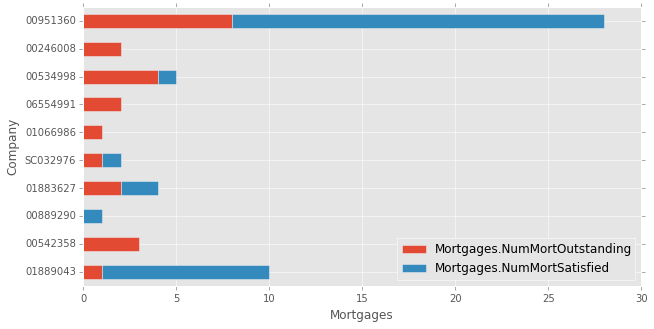

In [367]:
import matplotlib
matplotlib.style.use('ggplot')

has_mortgage = df['Mortgages.NumMortCharges'] > 0

mortgages = [u'Mortgages.NumMortOutstanding',
             u'Mortgages.NumMortSatisfied']

ax = df[has_mortgage].head(10)[mortgages].plot(kind='barh', stacked=True, figsize=(10, 5))

ax.set_yticklabels(tuple(df[has_mortgage].CompanyNumber))
ax.set_ylabel("Company")
ax.set_xlabel("Mortgages")

Other common plotting operations are ```hist()```, ```df.plot(kind='scatter')``` and ```df.plot(kind='hexbin')```.

<img src="scatter.png">

### A few gotchas

Use ```empty```, ```any()```, ```all()```, ```bool()``` and ```equals()``` to compare ```DataFrames``` and ```Series```.

In [368]:
(df['Mortgages.NumMortCharges']>100).any()

True

In [369]:
df2 = df.copy(deep=True)
df.equals(df2)

True

Be aware of the ```SettingWithCopyWarning```. Remember that ```df[df.CompanyStatus == 'Active']``` returns a copy of a ```DataFrame```, so if you try to set a new value on the basis of this it will not work.

In [370]:
df[df['CompanyStatus'] == 'Active']['Solvent'] = True

/Users/alex/.virtualenvs/ipython/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [371]:
'Solvent' in df.columns

False

Instead, in this case I would set the 'base case', and then use ```.loc``` to downselect to the rows I need to change.

In [372]:
df['Solvent'] = False
df.loc[df['CompanyStatus'] == 'Active', 'Solvent'] = True

In [373]:
df[df.Solvent].CompanyStatus.value_counts()

Active    10337
dtype: int64

### Things I haven't covered

* Timeseries
* Panels (> 2 dimensions ```DataFrames```)
* Hierarchical indexing 
* Transformations (```melt()``` and ```pivot()```)
* ```categorical``` values (since ```0.15```)
* Other computational tools (```rolling_sum()```, ```rolling_std()```, ```rolling_apply()```)

### Key takeaways

* pandas is extremely powerful
* With great power etc - as with all code, readability beats writability
* pandas is not as internally consistent as it could be (works in place or returns)
* Whatever you want to do with your dataset there is probably a method in pandas for doing it - try to use inbuilt pandas functionality rather than eg iterating over rows/columns and doing something custom, it might just take a bit of digging and can feel 'head against wallish' for a bit
* Whatever you want to do with your dataset there are probably multiple ways of doing it in pandas - try to be (internally and externally) consistent and produce readable code
* Consider abstractions (eg GrowthIntel masks) to make code and notebooks more readable

### Resources

* GrowthIntel blog post on Mask algebra: 
http://growthintel.com/exploratory-data-analysis-in-pandas/
* pandas docs are comprehensive and getting better: http://pandas.pydata.org/
* Ecosystem of libraries is growing all the time: http://pandas.pydata.org/pandas-docs/version/0.16.2/ecosystem.html
* Book: Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython by Wes McKinney (author of pandas)
* Wes McKinney's blog: http://blog.wesmckinney.com/